In [1]:
from julia.api import Julia
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)


In [2]:
print(jl.eval('Threads.nthreads()'))
jl.eval('include("time_statistics.jl")')

4


<PyCall.jlwrap time_e_var>

### **1a. Time when varyng A dimentions with random matrix, fixed n** ###

          dim       time           Methods
0  (100, 100)   0.018824               SVD
1  (150, 100)   0.024179               SVD
2  (200, 100)   0.029340               SVD
3  (250, 100)   0.034221               SVD
0  (100, 100)   5.358927  ALSQR Sequential
1  (150, 100)   7.131698  ALSQR Sequential
2  (200, 100)  10.028874  ALSQR Sequential
3  (250, 100)  12.766907  ALSQR Sequential
0  (100, 100)   2.658403    ALSQR Parallel
1  (150, 100)   3.765707    ALSQR Parallel
2  (200, 100)   5.685658    ALSQR Parallel
3  (250, 100)   6.918759    ALSQR Parallel


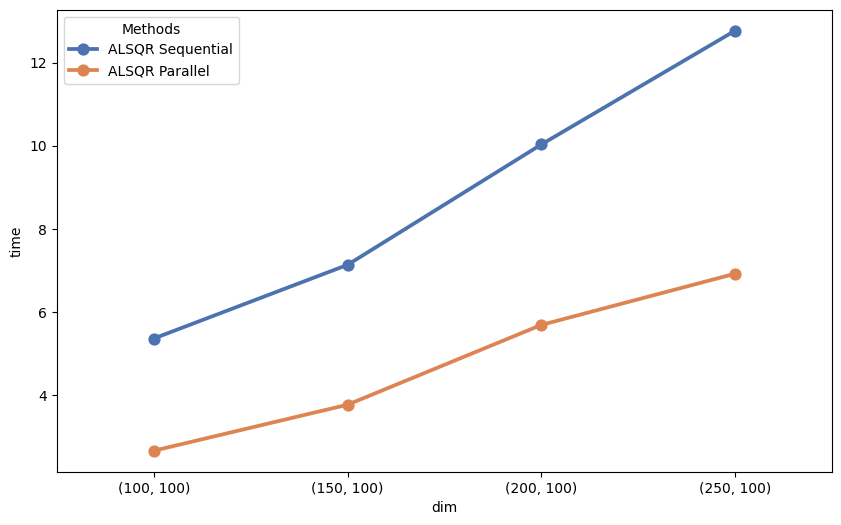

In [ ]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var()')

# Convert to DataFrames
#df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
#df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

df = pd.concat([df2, df3])
print(df)
# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions")
plt.show()


### **1. Time when varyng A dimentions square matrices** ###

Cicli totali: 309
Cicli totali: 309
Cicli totali: 459
Cicli totali: 459
Cicli totali: 3345
Cicli totali: 3345
Cicli totali: 479
Cicli totali: 479
Cicli totali: 1036
Cicli totali: 1036


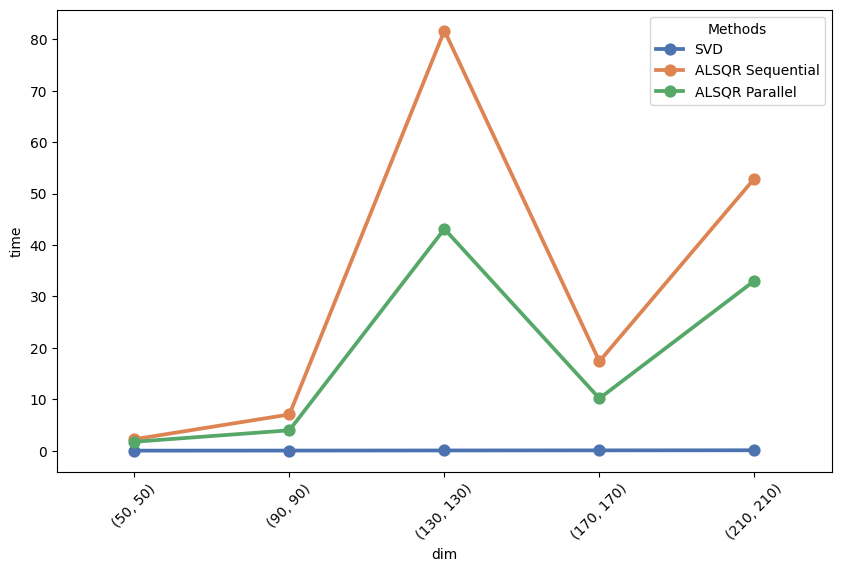

In [ ]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_square()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'



# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, square matrices")
plt.show()

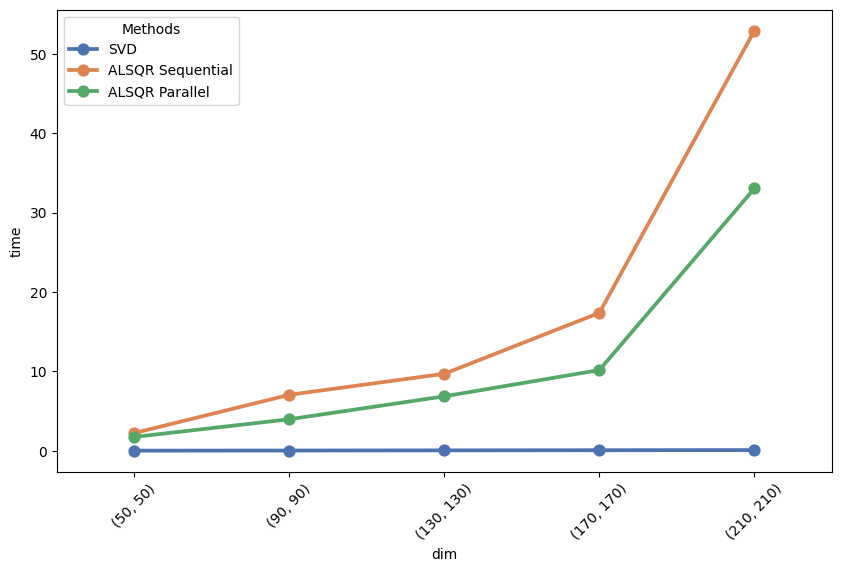

In [ ]:
df.loc[(df['dim'] == '(130, 130)') & (df['Methods'] == 'ALSQR Sequential'), 'time'] = 9.697549
df.loc[(df['dim'] == '(130, 130)') & (df['Methods'] == 'ALSQR Parallel'), 'time'] = 6.856136
# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, square matrices")
plt.show()


Cicli totali: 382
Cicli totali: 382
Cicli totali: 579
Cicli totali: 579
Cicli totali: 981
Cicli totali: 981
Cicli totali: 975
Cicli totali: 975
Cicli totali: 2033
Cicli totali: 2033
          dim       time           Methods
0   (100, 25)   0.006691               SVD
1   (180, 45)   0.010950               SVD
2   (260, 65)   0.018204               SVD
3   (340, 85)   0.028838               SVD
4  (420, 105)   0.041625               SVD
0   (100, 25)   2.866740  ALSQR Sequential
1   (180, 45)   8.847741  ALSQR Sequential
2   (260, 65)  26.066507  ALSQR Sequential
3   (340, 85)  34.412995  ALSQR Sequential
4  (420, 105)  90.793324  ALSQR Sequential
0   (100, 25)   1.616867    ALSQR Parallel
1   (180, 45)   5.013869    ALSQR Parallel
2   (260, 65)  13.491685    ALSQR Parallel
3   (340, 85)  16.826458    ALSQR Parallel
4  (420, 105)  49.528585    ALSQR Parallel


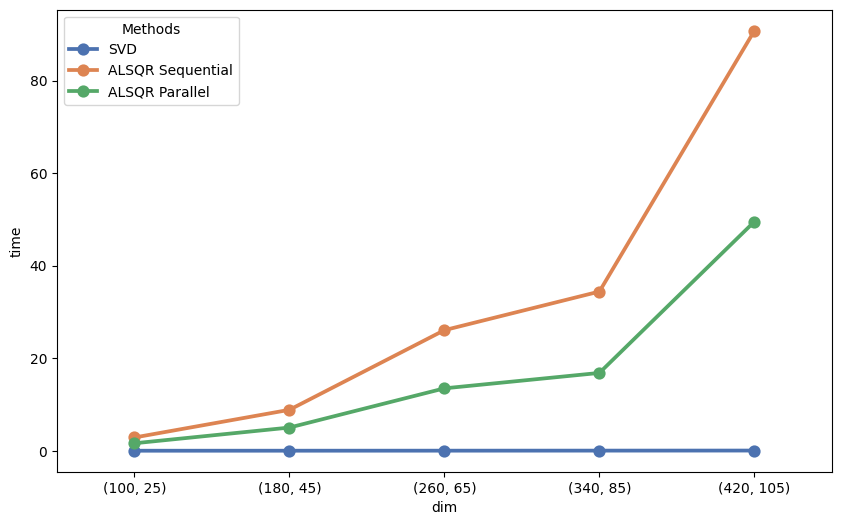

In [3]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_thin()')
# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])
print(df)
# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, thin matrices")
plt.show()

Cicli totali: 169
Cicli totali: 169
Cicli totali: 748
Cicli totali: 748
Cicli totali: 441
Cicli totali: 441
Cicli totali: 2244
Cicli totali: 2244
Cicli totali: 1118
Cicli totali: 1118
          dim       time           Methods
0   (25, 100)   0.001727               SVD
1   (45, 180)   0.007093               SVD
2   (65, 260)   0.018210               SVD
3   (85, 340)   0.030406               SVD
4  (105, 420)   0.051134               SVD
0   (25, 100)   1.204290  ALSQR Sequential
1   (45, 180)  10.713268  ALSQR Sequential
2   (65, 260)   9.678623  ALSQR Sequential
3   (85, 340)  74.804454  ALSQR Sequential
4  (105, 420)  55.766112  ALSQR Sequential
0   (25, 100)   0.635069    ALSQR Parallel
1   (45, 180)   5.349298    ALSQR Parallel
2   (65, 260)   4.953705    ALSQR Parallel
3   (85, 340)  40.603300    ALSQR Parallel
4  (105, 420)  27.730559    ALSQR Parallel


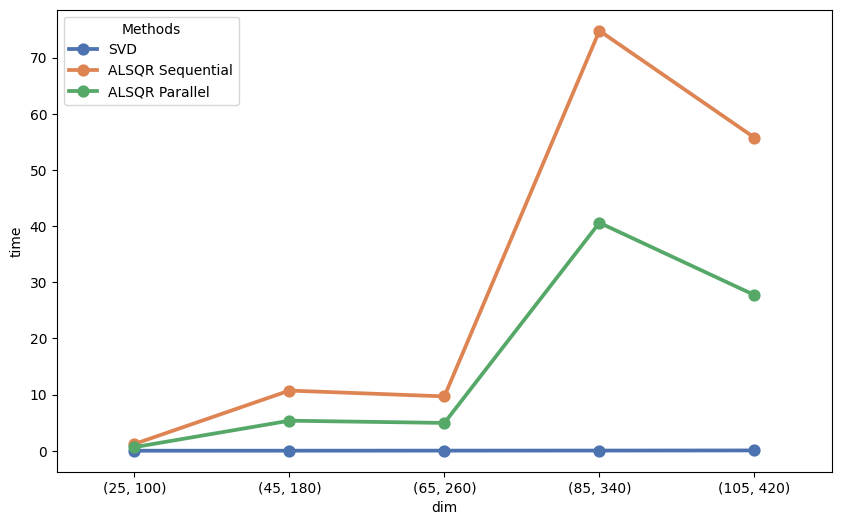

In [4]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var_fat()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])
print(df)
# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, fat matrices")
plt.show()

Cicli totali: 302
Cicli totali: 374
Cicli totali: 244
Cicli totali: 454
Cicli totali: 1115
Cicli totali: 554
Cicli totali: 1076
Cicli totali: 770
Cicli totali: 1606
Cicli totali: 1458
Cicli totali: 2869
Cicli totali: 780
Cicli totali: 1198
Cicli totali: 1447
Cicli totali: 1757
Cicli totali: 1749
Cicli totali: 1638
Cicli totali: 778
Cicli totali: 1589
Cicli totali: 2399


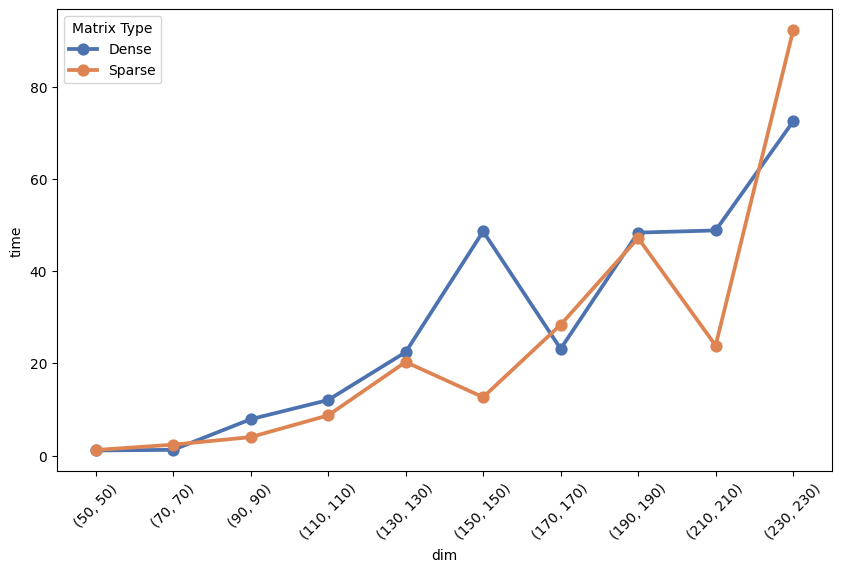

In [ ]:
Dense, Sparse = jl.eval('time_A_var_dense_sparse()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Dense)
df2 = pd.DataFrame(Sparse)

# Add a 'method' column to distinguish the data sources
df1['Matrix Type'] = 'Dense'
df2['Matrix Type'] = 'Sparse'


# Concatenate the dataframes
df = pd.concat([df1, df2])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Matrix Type', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, dense and sparse matrices")
plt.show()

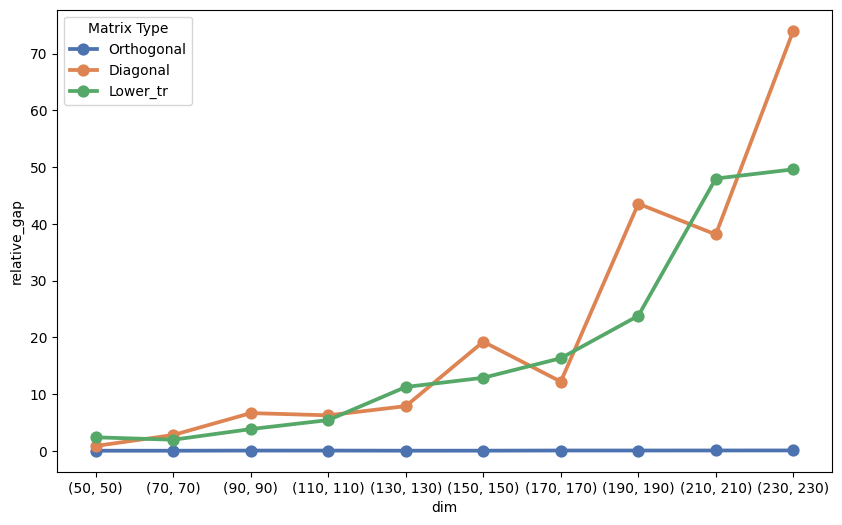

In [ ]:
Orthogonal, Diagonal, Lower_tr = jl.eval('time_A_var_orth_diag_lower()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Orthogonal)
df2 = pd.DataFrame(Diagonal)
df3 = pd.DataFrame(Lower_tr)

# Add a 'method' column to distinguish the data sources
df1['Matrix Type'] = 'Orthogonal'
df2['Matrix Type'] = 'Diagonal'
df3['Matrix Type'] = 'Lower_tr'


# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Matrix Type', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying A dimentions, orthogonal, diagonal and lower triangular matrices")
plt.show()

### **------------------------------------------------------------------------------------------------** ###

### **2. Time when varying rank k value** ###

     k      time           Methods
0   10  0.007764               SVD
1   15  0.008751               SVD
2   20  0.007505               SVD
3   25  0.008458               SVD
4   30  0.007345               SVD
5   35  0.007266               SVD
6   40  0.008469               SVD
7   45  0.010002               SVD
8   50  0.008249               SVD
9   10  2.112456  ALSQR Sequential
10  15  1.894345  ALSQR Sequential
11  20  1.751615  ALSQR Sequential
12  25  6.375853  ALSQR Sequential
13  30  2.716628  ALSQR Sequential
14  35  2.900000  ALSQR Sequential
15  40  5.316628  ALSQR Sequential
16  45  3.500000  ALSQR Sequential
17  50  0.016007  ALSQR Sequential
18  10  1.108193    ALSQR Parallel
19  15  0.961010    ALSQR Parallel
20  20  0.905689    ALSQR Parallel
21  25  2.955873    ALSQR Parallel
22  30  1.211378    ALSQR Parallel
23  35  1.300000    ALSQR Parallel
24  40  2.916628    ALSQR Parallel
25  45  1.500000    ALSQR Parallel
26  50  0.017347    ALSQR Parallel


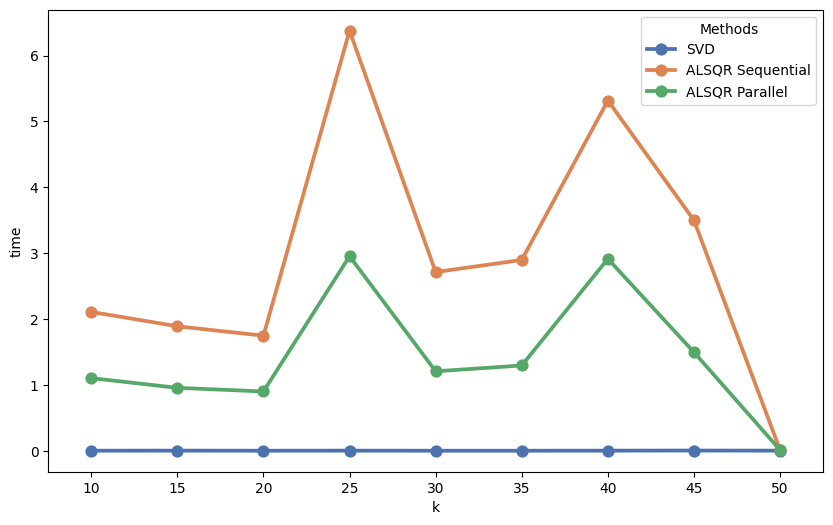

In [ ]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_k_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying k values")
plt.show()

### **3. Time when varying the e value** ### 

Cicli totali: 243
Cicli totali: 243
Cicli totali: 300
Cicli totali: 300
Cicli totali: 357
Cicli totali: 357
Cicli totali: 414
Cicli totali: 414
Cicli totali: 470
Cicli totali: 470
Cicli totali: 527
Cicli totali: 527
Cicli totali: 584
Cicli totali: 584
Cicli totali: 641
Cicli totali: 641


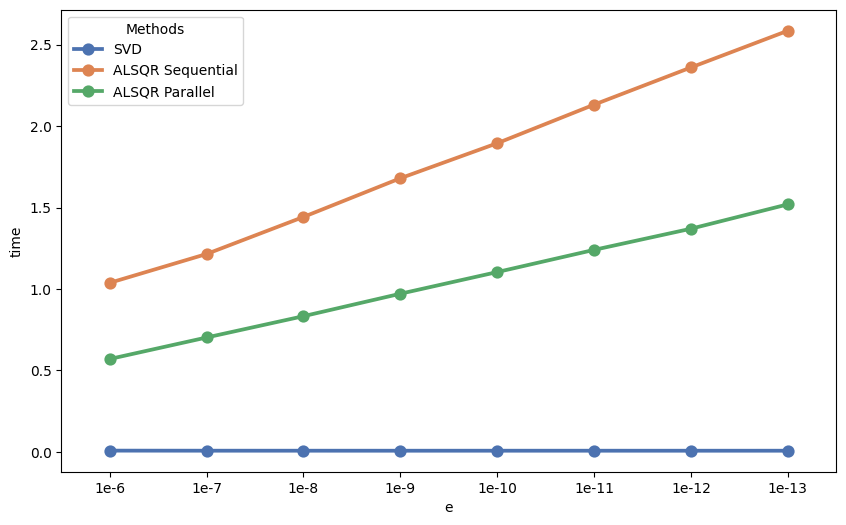

In [11]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_e_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'ALSQR Sequential'
df3['Methods'] = 'ALSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

df['e'] = df['e'].apply(lambda x: f"1e-{int(-np.log10(x))}")

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='e', y='time', hue='Methods', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Time varying e values")
plt.show()